In [25]:
import numpy as np
import matplotlib.pyplot as plt

from data_loader import CIFAR_10_DataLoader
import torch
import losses
%matplotlib inline

In [26]:
file_directory = '/Users/subhojit/Downloads/cifar-10-batches-py'
cdl = CIFAR_10_DataLoader()
xtrain_data, ytrain_data, Xtest, ytest = cdl.load_cifar_10_dataset(file_directory)

xtrain_data = xtrain_data.astype('float32') / 255.0
Xtest = Xtest.astype('float32') / 255.0

# np.random.shuffle(Xtrain)
n1 = int(0.8 * len(xtrain_data))
Xtrain = xtrain_data[:n1]
ytrain = ytrain_data[:n1]
Xdev = xtrain_data[n1:]
ydev = ytrain_data[n1:]

num_classes = len(set(ytrain))

In [27]:
# data preparation
np.random.seed(231)
std_dev = 1e-2
n_hidden = 200
W1 = np.random.randn(3072, n_hidden) * std_dev
b1 = np.zeros(n_hidden)
W2 = np.random.randn(n_hidden, num_classes) * std_dev
b2 = np.zeros(10)

parameters = [W1, b1, W2, b2]

print(sum(par.size for par in parameters))

616610


In [28]:
def softmax_loss(scores, y):
    epsilon = 1e-12
    num_examples = scores.shape[0]
    shifted_scores = scores - np.max(scores, axis=1, keepdims=True)
    exp_scores = np.exp(shifted_scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    correct_log_probs = -np.log(probs[np.arange(num_examples), y] + epsilon)
    loss = np.mean(correct_log_probs)
    return loss

def softmax_numpy(x, axis=1):
    x_shifted = x - np.max(x, axis=axis, keepdims=True)
    exp_x = np.exp(x_shifted)
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

In [29]:
max_iterations = 10000
batch_size = 128
lossi = []
Hs = []

for i in range(max_iterations):

    #mini batch
    ix = np.random.randint(0, Xtrain.shape[0], (batch_size,))
    Xb, Yb = Xtrain[ix], ytrain[ix]

    #farward pass
    hpreact = np.dot(Xb, W1) + b1
    h1 = np.maximum(hpreact, 0)
    Hs.append(h1)

    scores = np.dot(h1, W2) + b2

    # backward pass
    loss = softmax_loss(scores, Yb)
    lossi.append(loss)
    dscores = softmax_numpy(scores)
    dscores[np.arange(Xb.shape[0]), Yb] -= 1
    dscores /= Xb.shape[0]

    dW2 = np.dot(h1.T, dscores)
    db2 = np.sum(dscores, axis=0)
    dh1 = np.dot(dscores, W2.T)
    dhpreact = dh1 * (hpreact > 0)
    dW1 = np.dot(Xb.T, dhpreact)
    db1 = np.sum(dhpreact, axis=0)

    grads = [dW1, db1, dW2, db2]
    # print(grads)
    lr = 0.01
    W1 += -lr * dW1
    b1 += -lr * db1
    W2 += -lr * dW2
    b2 += -lr * db2
    if i % 100 == 0:
        print(f"loss: {loss:.4f}")

loss: 2.3001
loss: 2.2858
loss: 2.2276
loss: 2.1795
loss: 2.0487
loss: 2.0658
loss: 2.0124
loss: 1.9976
loss: 1.9081
loss: 1.9235
loss: 1.9197
loss: 2.0006
loss: 1.9379
loss: 1.9834
loss: 1.9171
loss: 1.9347
loss: 1.8084
loss: 1.7996
loss: 1.8526
loss: 1.8769
loss: 1.7104
loss: 1.8085
loss: 1.7006
loss: 1.7699
loss: 1.7523
loss: 1.7233
loss: 1.7909
loss: 1.9427
loss: 1.6853
loss: 1.8465
loss: 1.6701
loss: 1.8113
loss: 1.7893
loss: 1.6950
loss: 1.6355
loss: 1.6560
loss: 1.8123
loss: 1.7404
loss: 1.8192
loss: 1.6722
loss: 1.6470
loss: 1.6418
loss: 1.7464
loss: 1.6650
loss: 1.5843
loss: 1.5997
loss: 1.6049
loss: 1.6962
loss: 1.5891
loss: 1.5935
loss: 1.5866
loss: 1.6931
loss: 1.6442
loss: 1.6288
loss: 1.6645
loss: 1.5755
loss: 1.5763
loss: 1.6560
loss: 1.7030
loss: 1.5318
loss: 1.6440
loss: 1.5358
loss: 1.6388
loss: 1.5041
loss: 1.6081
loss: 1.5422
loss: 1.4966
loss: 1.4918
loss: 1.5987
loss: 1.4579
loss: 1.7661
loss: 1.4817
loss: 1.6167
loss: 1.4661
loss: 1.4701
loss: 1.5160
loss: 1.5900

(array([  1.,   0.,   0.,   1.,   0.,   0.,   5.,   3.,   4.,   6.,   9.,
          6.,  16.,  18.,  18.,  18.,  34.,  41.,  47.,  56.,  60.,  73.,
        102.,  98., 122., 236., 251., 137.,  98.,  85.,  69.,  62.,  59.,
         52.,  42.,  36.,  35.,  19.,  20.,  13.,  14.,   5.,   7.,   7.,
          6.,   3.,   1.,   2.,   2.,   1.]),
 array([-0.39279038, -0.37780148, -0.36281257, -0.34782367, -0.33283476,
        -0.31784586, -0.30285696, -0.28786805, -0.27287915, -0.25789024,
        -0.24290134, -0.22791243, -0.21292353, -0.19793463, -0.18294572,
        -0.16795682, -0.15296791, -0.13797901, -0.1229901 , -0.1080012 ,
        -0.09301229, -0.07802339, -0.06303449, -0.04804558, -0.03305668,
        -0.01806777, -0.00307887,  0.01191004,  0.02689894,  0.04188784,
         0.05687675,  0.07186565,  0.08685456,  0.10184346,  0.11683237,
         0.13182127,  0.14681018,  0.16179908,  0.17678798,  0.19177689,
         0.20676579,  0.2217547 ,  0.2367436 ,  0.25173251,  0.26672141,
 

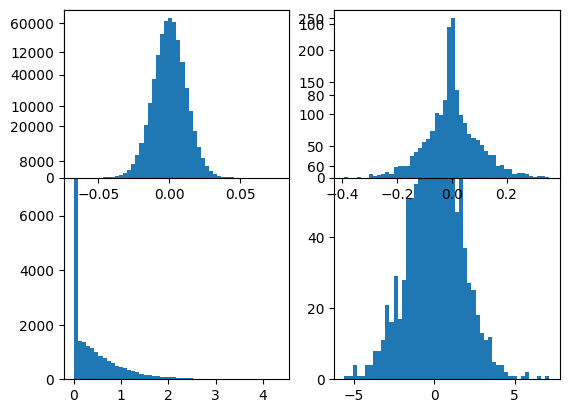

In [6]:
plt.figure()
plt.subplot(121)
plt.hist(h1.reshape(-1).tolist(), 50)
plt.subplot(122)
plt.hist(scores.reshape(-1).tolist(), 50)
plt.subplot(221)
plt.hist(W1.reshape(-1).tolist(), 50)
plt.subplot(222)
plt.hist(W2.reshape(-1).tolist(), 50)

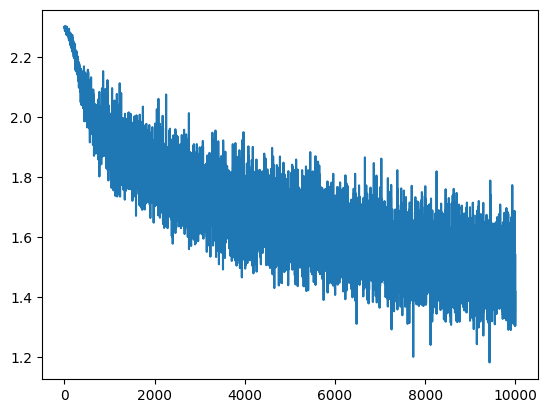

In [7]:
plt.plot(lossi)

In [8]:
def split_loss(split):
    x, y = {
        'train': (Xtrain, ytrain),
        'dev': (Xdev, ydev),
        'test': (Xtest, ytest),
    }[split]
    h1 = np.dot(x, W1) + b1
    scores = np.dot(h1, W2) + b2
    loss = softmax_loss(scores, y)
    print(f"{split} => loss: {loss:.4f}")

split_loss('train')
split_loss('dev')


train => loss: 1.9446
dev => loss: 2.0247


In [9]:
split_loss('test')

test => loss: 2.0173


In [10]:
def accuracy(x, labels):
    h1 = np.dot(x, W1) + b1
    scores = np.dot(h1, W2) + b2
    probs = softmax_numpy(scores)

    preds = np.argmax(probs, axis=1)
    return np.mean(preds == labels)

accuracy(Xtest, ytest)


np.float64(0.3387)

In [ ]:
plt.figure(figsize=(20, 4))
legends = []
for i, layer in enumerate([scores]):
    t = layer[0]
    print('layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' % (i, layer.__class__.__name__, t.mean(), t.std(), (np.abs(t) > 0.97).astype(np.float32).mean()*100))
    hy, hx = plt.hist(t.tolist(), 50)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')

plt.legend(legends);
plt.title('activation distribution')

In [32]:
for h in Hs:
    print(h[0].mean(), h[0].std())

0.06961843838444107 0.09231597906013281
0.134140081111795 0.17354272858032804
0.14627746466842795 0.19085043404514596
0.15839703963805574 0.20033721328504245
0.10974647842911903 0.14682303484808007
0.12503866808403127 0.16953873917706713
0.11019720384250206 0.149820609729095
0.18664620815057206 0.2408504233337791
0.11670840523325808 0.14927687584347682
0.1732534271091333 0.2184447416878432
0.12203615949030137 0.1563745221598412
0.10721777097889068 0.14022716074006633
0.18358827984693718 0.2547653619895366
0.04656077064959868 0.05976478784904123
0.17234996892247184 0.21940574239727972
0.11452493192194194 0.15028258564603017
0.15409837368878404 0.19778395324639875
0.11859349526987081 0.15237652461156506
0.12793483345560414 0.168209856460566
0.13295883572647538 0.18753520591463477
0.13921924540021327 0.1761718646509229
0.15292718003189915 0.19296990133601857
0.05972863583694477 0.08159711065115179
0.12806876436419795 0.1722084756944236
0.20314573114170384 0.2606687199325396
0.146992233041